## Intro. 컨텐츠 선호도 분석을 하는 이유

게임사에서 주요하게 신경을 쓰는 부분은 게임이 발생하는 매출과 게임 자체의 재미, 게임성이라고 생각하며 매출이 중요하다고 생각하는 이유는 이윤을 추구하는 기업이라는 특성상 당연한 부분으로 받여들여지지만 단순히 매출이 좋다고 좋은 게임이라고는 말할 수 없습니다.  
여기서 게임성이라는 부분이 개입이 되는데 게임성이 중요한 이유는 매출면에서 보면 게임성이 좋은 게임은 유저들이 해당 게임을 더 오래 즐기도록 만들어 주면서 장기적인 게임 결제의 기회를 늘리게 해주고 충성고객으로 만듦으로써 안정적인 매출을 유지할 수 있도록 만들기 때문입니다.

게임성에 영향을 주는 주요 요소는 게임내 유저가 즐길 컨텐츠의 질, 게임 환경 최적화 및 편의성, 안정적인 게임 재화 시스템등이 있지만 게임의 컨텐츠는 그 중에서도 게임의 정체성이고, 유저가 게임을 하는 재밌게 하기 위한 목적이기 때문에 중요한 부분입니다.

게임을 즐기기 위한 컨텐츠의 종류로도 게임 BGM 및 OST, 사냥, 레이드, 장비 강화를 통한 케릭터의 성장, 흥미로운 스토리등 다양하게 존재하는데 이 컨텐츠들중에서 실제로 유저들이 어떠한 컨텐츠를 주로 즐기는지 파악하고 어떤 컨텐츠를 기피하는지 알고 있어야 앞으로 게임을 운영하는데 있어서 방향성을 결정할 수 있습니다.

**컨텐츠 선호도 분석 진행 계획**

각 컨텐츠에 대한 선호도를 수집하는 방법으로는 직접 유저들에게 설문조사를 받는 방법이 가장 확실하지만 이 방법 말고도 던파에 관심을 가지고 다양한 의견을 표출하고 있는 유튜브의 던파TV 동영상들에 대한 조회수와 좋아요를 분석하여 영상 내용에 긍정인지 부정인지 1차적으로 파악하고 해당 영상의 댓글을 통하여 유저들의 직접적인 의견을 파악하겠습니다.

## 1. 데이터 불러오기

- Selenium 패키지를 사용하여 2022년 4월 3일까지 게재된 '던파TV 채널'의 영상들에 있는 Title과 url을 수집한 뒤, url에 있는 video_id를 추출하였습니다.
- 추출된 video_id로 id에 맞는 영상의 게시시간, 영상의 조회수, 영상의 좋아요 수를 수집하였습니다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from tqdm import tqdm 
import time 
import re
from konlpy.tag import Mecab
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
from collections import defaultdict
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [2]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False})

In [3]:
title_id_dataset = pd.read_csv("../data/analysis_data/title_id_date_view_like.csv", index_col=[0])
title_id_dataset.head()

,title,video_id,video_date,video_view,video_like
0,NEOPLE - 루키 4인팟이 전하는 입사 꿀팁,YOgOfpdHkRk,2022-03-30T04:24:50Z,2481,37
1,NEOPLE - 네오플과 함께한 16년,eJ76enP5JSQ,2022-03-30T04:24:45Z,2585,76
2,[던파] 우리는... 100의 민족입니까? (메이킹 필름),dlg9e5vZpSM,2022-03-28T02:37:57Z,1863,52
3,[던파] 던.직.이(?) 감스트가 소개하는 110레벨 만렙 확장 업데이트,FkD3jqoXquA,2022-03-17T04:04:13Z,18021,380
4,[던파] 우리는... 100의 민족입니까?,HbZFryV0JQ8,2022-03-17T03:03:55Z,984382,872


- video_id마다 달려있는 댓글 내용, 댓글 작성자, 댓글 작성시간, 댓글 좋아요 수를 수집하였습니다.

In [4]:
total_comments = pd.read_csv("../data/analysis_data/total_comment.csv", index_col=[0])
total_comments.head()

,comment,author,author_date,author_like,video_id
0,저는 이런 구직관련 마케팅도 너무 좋고 중요하다고 생각해요. 요즘 게임은 재미로만 ...,붐붐,2022-03-30T06:07:10Z,1,YOgOfpdHkRk
1,던파 진짜 많이개선되었죠,진 벤티,2022-04-03T04:35:57Z,0,YOgOfpdHkRk
2,개발자.. 개발자가 필요하다.. 존나 많은 개발자가..,ᄇᄇᄏ,2022-03-31T00:18:52Z,0,YOgOfpdHkRk
3,105 에픽 보조장비에 스킬공격력 증가를 추가로 8퍼센트 더 달아달라 ㅠㅠㅠ,버티는 마갤,2022-03-30T08:52:29Z,0,YOgOfpdHkRk
4,네오플 화이팅하새요,매드인형,2022-03-30T04:38:59Z,0,YOgOfpdHkRk


## 2. 데이터 전처리

### 2.1 중복 데이터 확인

In [5]:
print(f"영상제목 데이터셋 중복 결과 확인 전: {title_id_dataset.shape}")
print(f"영상제목 데이터셋 중복 결과 확인 후: {title_id_dataset.drop_duplicates().shape}")

영상제목 데이터셋 중복 결과 확인 전: (1213, 5)
영상제목 데이터셋 중복 결과 확인 후: (1213, 5)


In [6]:
print(f"댓글 데이터셋 중복 결과 확인 전: {total_comments.shape}")
print(f"댓글 데이터셋 중복 결과 확인 후: {total_comments.drop_duplicates().shape}")

댓글 데이터셋 중복 결과 확인 전: (71715, 5)
댓글 데이터셋 중복 결과 확인 후: (71712, 5)


In [7]:
# 중복되는 데이터
total_comments.iloc[np.arange(len(total_comments))[total_comments.reset_index(drop=True).duplicated()], :]

,comment,author,author_date,author_like,video_id
9,222🙂🤑w🤠22222@도독도독옹😀 비까지🙂 🙂🙂🙂😎🙂🤑😎🙂🙂😎😎🙂,re xsht,2020-08-28T07:18:12Z,0,NInrFWfVgQw
112,이거 라온님이 절반 불른거임? ㅎㄷㄷ,백민기,2016-07-21T13:12:35Z,0,Skgxe7qEZUE
94,순간화날뻔 <br>,박병종,2014-01-24T03:56:26Z,0,v_bpV-i0BCo


In [8]:
total_comments = total_comments.drop_duplicates()
print(f"댓글 데이터셋 중복 제거 후: {total_comments.shape}")

댓글 데이터셋 중복 제거 후: (71712, 5)


### 2.2 결측 데이터 확인

In [9]:
title_id_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1213 non-null   object
 1   video_id    1213 non-null   object
 2   video_date  1213 non-null   object
 3   video_view  1213 non-null   int64 
 4   video_like  1213 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 56.9+ KB


In [10]:
total_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71712 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comment      71712 non-null  object
 1   author       71705 non-null  object
 2   author_date  71712 non-null  object
 3   author_like  71712 non-null  int64 
 4   video_id     71712 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


### 2.3 댓글 데이터에 적용시킬 텍스트 전처리

- html 태그 제거
- 특수문자 제거
- 반복되는 공백 제거
- 앞 뒤 공백 제거
- Mecab으로 형태소 단위로 문장 분절
- 불용어 제거

In [11]:
def process(x, mecab, stopwords = False, split = False, min_len = None):
    
    # 같은 문장이 반복되는 경우
    if "<br>" in x:
        tmp = x.split("<br>")
        if tmp[0] == tmp[1]:
            x = tmp[0]
    
    # html 태그, 특수문자, 공백 제거
    x = re.sub("(<([^>]+)>)"," ", x)
    x = re.sub("[^a-zA-Zㄱ-ㅎ가-힣0-9]", " ", x)
    x = re.sub("[ ]+", " ", x)
    x = x.strip()
    
    # 필요한 경우 형태소 분석
    if split:
        x = mecab.morphs(x)
    
    # 필요한 경우 불용어 제거
    if stopwords:
        x = [i for i in x if i not in stopwords]
    
    if min_len:
        x = [i for i in x if len(i) >= min_len]
    
    return x

mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")
stopwords = ["은", "는", "이", "가", "는데", "지만", "으로", "세요", 
             "에서", "습니다", "한다", "인데", "면서", "부터", "아요",
            "ㅋㅋ", "ㅋㅋㅋ"]

## 3. 데이터 분석

### 3.1 던파TV 채널 인기 컨텐츠 선호도 분석

영상의 조회수(video view)는 유저가 해당 영상의 내용에 관심을 가지는 정도라고 볼 수 있고, 좋아요(video like)라는 지표는 해당 영상에 대한 확실한 유저들의 의견표출이라고 볼 수 있습니다.
 
기준 지표를 정하게 되면 해당 지표를 기준으로 컨텐츠가 사람들에게 선호되고 있는지 아니면 무관심한지 판단하기 한결 수월할 것입니다.  
추가적으로 평균을 사용하면 압도적으로 '조회수', '좋아요'가 높은 컨텐츠에 편향되어 객관적인 판단을 하기 어렵기에 중앙값을 대표값으로 사용하겠습니다.

$조회수의 비율 = \frac{id 조회수}{조회수의 중앙값} $ $좋아요의 비율 = \frac{id 좋아요}{좋아요의 중앙값} $

'중앙값 조회수에 따른 각 id별 조회수 비율'과 '중앙값 좋아요에 따른 각 id별 좋아요 비율' 을 통하여 해당 컨텐츠의 조회수와 좋아요 개수가 일반적인 경우 보다 많은지 적은지 판단하기 쉬워지고 두 비율 모두 분석에 있어서 중요하기에 동일한 가중치를 가지는 하나의 값으로 표현하기 위해서 두 비율의 평균을 사용하겠습니다.

$LVSM = \frac{조회수의 비율 + 좋아요의 비율}{2}$

두 비율의 평균으로 새로 만든 지표를 Like View Scaled-Mean(LVSM)라고 부르겠습니다.

In [55]:
cp_title_id_dataset = title_id_dataset.copy()
cp_title_id_dataset["scaled_video_like"] = cp_title_id_dataset["video_like"] / cp_title_id_dataset["video_like"].median()
cp_title_id_dataset["scaled_video_view"] = cp_title_id_dataset["video_view"] / cp_title_id_dataset["video_view"].median()
cp_title_id_dataset["LVSM"] = (cp_title_id_dataset["scaled_video_view"] + cp_title_id_dataset["scaled_video_like"]) / 2
cp_title_id_dataset["video_date"] = cp_title_id_dataset["video_date"].apply(lambda x : pd.Timestamp(x))
cp_title_id_dataset.head()

,title,video_id,video_date,video_view,video_like,scaled_video_like,scaled_video_view,LVSM
0,NEOPLE - 루키 4인팟이 전하는 입사 꿀팁,YOgOfpdHkRk,2022-03-30 04:24:50+00:00,2481,37,0.637931,0.107668,0.372800
1,NEOPLE - 네오플과 함께한 16년,eJ76enP5JSQ,2022-03-30 04:24:45+00:00,2585,76,1.310345,0.112182,0.711263
2,[던파] 우리는... 100의 민족입니까? (메이킹 필름),dlg9e5vZpSM,2022-03-28 02:37:57+00:00,1863,52,0.896552,0.080849,0.488700
3,[던파] 던.직.이(?) 감스트가 소개하는 110레벨 만렙 확장 업데이트,FkD3jqoXquA,2022-03-17 04:04:13+00:00,18021,380,6.551724,0.782060,3.666892
4,[던파] 우리는... 100의 민족입니까?,HbZFryV0JQ8,2022-03-17 03:03:55+00:00,984382,872,15.034483,42.719351,28.876917


LVSM을 video date의 연도순에 따라서 선 도표로 시각화를 시킨 결과는 아래와 같습니다.

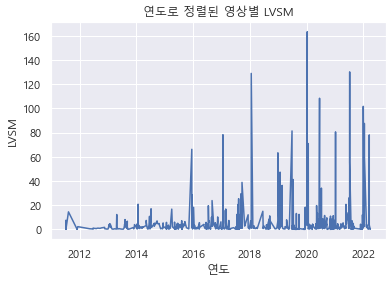

In [56]:
plt.plot(cp_title_id_dataset["video_date"], cp_title_id_dataset["LVSM"])
plt.title("연도로 정렬된 영상별 LVSM")
plt.xlabel("연도")
plt.ylabel("LVSM")
plt.show()

위의 선도표를 보니 중간중간에 갑자기 LVSM이 다른 영상에 비해서 월등히 큰 영상들이 존재하는 것을 확인할 수 있었습니다.  
우선 60 이상의 급격한 변화를 보이기 시작한 2016년의 영상을 기준으로 LVSM 60이상의 영상들은 어떤 종류가 있는지 알아보겠습니다.

In [57]:
ranges = np.arange(len(cp_title_id_dataset))
upper_60_index = cp_title_id_dataset[cp_title_id_dataset["LVSM"] >= 60].index
labels = [cp_title_id_dataset.iloc[i, 0] if i in upper_60_index else str(" ") for i in ranges]
fig = px.line(cp_title_id_dataset, x="video_date", y="LVSM", 
              hover_name = "title", markers = True, title="영상에 따른 LVSM 점수", text = labels)
fig.show()

plotly 패키지를 사용하다보니 가끔 출력물 결과가 안나올때가 있으므로 따로 분석하고자 하는 그래프를 따로 캡처해두겠습니다.

![image](https://user-images.githubusercontent.com/51338268/162109144-3bc40402-0382-4fc2-82e8-8f5b6ac5be54.png)

**분석 인사이트 정리**
- LVSM 지표를 기준으로 60점 이상의 영상들의 제목을 표시한 결과 광고, 던파OST, 대규모 업데이트, 신직업 업데이트, 대규모 이벤트등이 높은 점수를 가진 것으로 나타났습니다.
- 해당 선도표를 통하여 던파의 주요 컨텐츠인 사냥, 레이드 뿐만 아니라 게임을 즐기고 몰입하는데 필수요소인 OST도 유저들의 반응이 좋은 것을 알 수가 있었습니다.
- 이벤트 관련 영상중에서는 '출동! 아라드 레인저'와 관련된 영상들의 LVSM이 전체적으로 높게 책정되었으며 그 이유는 해당 이벤트가 캐릭터의 성장에 도움이 되는 많은 아이템과 재화들을 뿌리는 이벤트이기 때문에 유저들의 반응이 좋은 걸로 생각이 됩니다.
- 특히 가장 높은 LVSM 점수를 받은 영상은 '[던파] 피할 수 없다면...각성하라!'로 나왔습니다.

이 중에서 가장 큰 LVSM과 가장 작은 LVSM 점수를 얻은 영상들에 있는 댓글 주제를 워드클라우드 빈도분석으로 파악하겠습니다.

In [15]:
max_score = cp_title_id_dataset["LVSM"].max()
max_video = cp_title_id_dataset[cp_title_id_dataset["LVSM"] == max_score]
max_video_id = max_video["video_id"].values[0]
max_comments = total_comments[total_comments["video_id"] == max_video_id]

comments_list = max_comments["comment"].apply(lambda x : process(x, mecab, stopwords, split=True)).tolist()
comments_list = sum(comments_list, [])
comments_list = [i for i in comments_list if len(i) != 1]
max_video

,title,video_id,video_date,video_view,video_like,scaled_video_like,scaled_video_view,LVSM
612,[던파] 피할 수 없다면…각성하라!,o6JdSmbx4nc,2020-01-09 03:24:40+00:00,6353604,2961,51.051724,275.72816,163.389942


In [16]:
min_score = cp_title_id_dataset["LVSM"].min()
min_video = cp_title_id_dataset[cp_title_id_dataset["LVSM"] == min_score]
min_video_id = min_video["video_id"].values[0]
min_comments = total_comments[total_comments["video_id"] == min_video_id]

min_comments_list = min_comments["comment"].apply(lambda x : process(x, mecab, stopwords, split=True)).tolist()
min_comments_list = sum(min_comments_list, [])
min_comments_list = [i for i in min_comments_list if len(i) != 1]
min_video

,title,video_id,video_date,video_view,video_like,scaled_video_like,scaled_video_view,LVSM
574,[던파] 던송합니다 - 던팟캐스트 시즌2 모아보기,8apLmIS_T4k,2020-03-12 07:10:29+00:00,375,3,0.051724,0.016274,0.033999


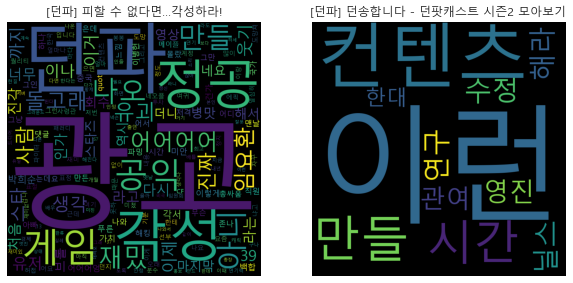

In [17]:
max_c = Counter(comments_list)
max_wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
max_gen = max_wc.generate_from_frequencies(max_c)

min_c = Counter(min_comments_list)
min_wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
min_gen = min_wc.generate_from_frequencies(min_c)

fig, axes = plt.subplots(1,2, figsize = (10,10))

axes[0].imshow(max_gen)
axes[0].set_title(max_video["title"].values[0])
axes[0].grid(False)
axes[0].axis("off")


axes[1].imshow(min_gen)
axes[1].set_title(min_video["title"].values[0])
axes[1].grid(False)
axes[1].axis("off")

plt.show()

In [18]:
like_top_comment = max_comments.sort_values("author_like", ascending=False)[["comment", "author_like"]].iloc[:20,:]
like_top_comment["comment"] = like_top_comment["comment"].apply(lambda x : process(x, mecab))
like_top_comment

,comment,author_like
196,아니 저는 총싸움 하러 왔는데요,149
159,게임은 하기싫은데 광고는 잘 만들었네요,132
190,02 32 형이 여기서 왜나와,55
214,요즘 무슨 약을 햇길레 광고계 이렇게 약쟁이들이 많은거죠 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,50
157,배그 들어와서 총알찾고 총찾고 나갔는데 던파가있누 ㅋㅋㅋㅋ,49
91,왜 39 던파 39 라는 단어만 봐도 웃기냐ㅋㅋㅋㅋㅋㅋ,34
1,마지막 관우편 진짜 쩔었다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,32
119,아왜 딴겜 한다는 사람을 찾아가서 괴롭히는거 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,30
86,그래 광고는 이렇게만드는거지ㅋㅋㅋㅋ 살면서 처음으로 광고 풀로 다봤네 ㅋㅋㅋㅋㅋ 존...,29
95,표정봐 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,28


In [19]:
like_top_min_comment = min_comments.sort_values("author_like", ascending=False)[["comment", "author_like"]].iloc[:20,:]
like_top_min_comment["comment"] = like_top_min_comment["comment"].apply(lambda x : process(x, mecab))
like_top_min_comment

,comment,author_like
0,이런거만들시간에 컨텐츠수정연구더해라,0
1,닐스가 이런거 하는 쪽 운영진은 컨텐츠에 관여 못한대,0


**분석 인사이트 정리**

1. LVSM 점수가 높았던 영상
    - [던파] 피할 수 없다면...각성하라! 제목의 영상 주제는 던파 캐릭터의 새로운 각성인 진각성 업데이트를 홍보하는 광고영상입니다.
    - 해당 광고 영상에 대한 댓글의 내용으로는 'ㅋㅋㅋ', '재밌', '병맛' 이라는 단어의 비율이 많은것으로 보아 해당 광고영상이 유머 위주의 영상으로 유저들은 해당 광고영상을 유머스럽게 받아들이고 있다고 생각합니다.
    - 해당 영상의 점수가 높았던 이유는 많은 던파 유저들이 기대하는 진각성 업데이트에 대한 기대감과 던파 특유의 유머스러운 광고영상 덕분에 해당 영상이 가장 큰 LVSM 을 획득할 수 있었다고 생각이 됩니다.
    - 던파가 진각성이라는 대규모의 업데이트를 시도하는데 '정공', '공익' 이라는 단어 언급횟수가 상당히 존재하고 2번째로 좋아요를 많이 받은 댓글의 내용을 보면 던파라는 게임의 이미지, 고정관념이 부정적인 편으로 보입니다.


2. LVSM 점수가 낮았던 영상
    - 가장 반응이 좋지 못했던 영상은 '던팟캐스트 시즌2' 였으며 해당 영상의 댓글 자체도 적었고 좋아요의 개수도 훨씬 적은 것으로 나타났습니다.

**앞으로 분석 방향**  
지금까지는 던파TV 채널에 있는 모든 영상을 다루었기 때문에 던파OST, 던파광고와 같은 영상이 다수 포함되면서 게임내 컨텐츠에 대한 선호도를 파악하기 어려웠습니다.
그러므로 대규모 업데이트에 대한 영상들 위주의 분석을 통하여 게임내의 컨텐츠 선호도 분석을 진행해보겠습니다.

### 3.2 던파 대규모 업데이트 선호도 분석

대규모 업데이트 위주의 분석을 위해서 대규모 업데이트와 관련된 영상만 따로 뽑아서 분석하겠습니다.  
던파의 대규모 업데이트의 제목에는 대분류로 '시즌'을 나누고 중분류로 'Act'로 나누기 때문에 두 단어가 포함이된 제목들을 위주로 수집해주겠습니다.  
가장 최근 대규모 업데이트인 시즌 8. THE NEXT JOURNEY 의 경우 Act가 빠져서 포함되지 않을 수 있기 때문에 따로 추가해주겠습니다.

In [20]:
update_video = pd.DataFrame()
for idx in range(len(cp_title_id_dataset)):
    title = cp_title_id_dataset["title"][idx]
    if "THE NEXT JOURNEY" in title:
        tmp = pd.DataFrame(cp_title_id_dataset.iloc[idx,:]).T
        update_video = pd.concat([update_video, tmp], axis = 0)        

    if "시즌" in title and "Act" in title and "광고" not in title and "프로모션" not in title:
        tmp = pd.DataFrame(cp_title_id_dataset.iloc[idx,:]).T
        update_video = pd.concat([update_video, tmp], axis = 0)
print(update_video.shape)
update_video = update_video.reset_index(drop=True)
update_video.head()

(78, 8)


,title,video_id,video_date,video_view,video_like,scaled_video_like,scaled_video_view,LVSM
0,[던파] 시즌 8. THE NEXT JOURNEY,PDdlxwhNW4w,2022-03-16 12:12:42+00:00,24901,237,4.086207,1.080632,2.583419
1,[던파] 시즌7 Act 19. Assault : 폭격개시,3jwAqRIYP0Y,2022-01-12 07:00:59+00:00,30090,203,3.5,1.30582,2.40291
2,[던파] 시즌7 Act 18. BLADE : 복수의 여신,kgRsVTwREtM,2021-07-07 09:06:21+00:00,28081,246,4.241379,1.218635,2.730007
3,[던파] 시즌7 Act 17. 혼돈의 오즈마,mLkXKC4asp4,2021-05-26 09:40:48+00:00,60291,377,6.5,2.616456,4.558228
4,[던파] 시즌 7 Act 16. 오버타임,QfvaQWpk5NI,2021-05-12 06:01:18+00:00,25549,175,3.017241,1.108753,2.062997


In [21]:
lvsm_desc = update_video["LVSM"].apply(float).describe()
dict_desc = dict(lvsm_desc)
upper_bound  = 1.5 * (dict_desc["75%"] - dict_desc["25%"]) + dict_desc["75%"]
print(lvsm_desc)
print(f"사분위수 범위 최댓값 : {upper_bound}")


count    78.000000
mean      2.680416
std       1.692403
min       0.364363
25%       1.365495
50%       2.583560
75%       3.400475
max       8.576794
Name: LVSM, dtype: float64
사분위수 범위 최댓값 : 6.452944794364958


In [22]:
import plotly.express as px

ranges = list(update_video.index)
lvsm_median = update_video["LVSM"].median()
upper_median_index = list(update_video[update_video["LVSM"] >= upper_bound].index)
labels = [update_video.iloc[i, 0] if i in upper_median_index else str(" ") for i in ranges]


fig = px.line(update_video, x="video_date", y="LVSM", 
              hover_name = "title", markers = True, title="업데이트에 따른 LVSM 점수", text=labels)
fig.add_hrect(y0 = lvsm_median, y1=upper_bound, fillcolor="red",
             line_width = 0, opacity = 0.2)
fig.show()

![image](https://user-images.githubusercontent.com/51338268/162143666-cb44d0f7-2a0c-447c-8747-1ba04df2dc36.png)

제 3사분위수 기준으로 1.5IQR 이상의 LVSM 점수를 받은 영상은 '[던파] 시즌7 Act 7. 깨달음의 빛', '[던파] 시즌7 Act 11. 심연의 고동' 2가지 이며 어떤 내용의 업데이트였는지 살펴보겠습니다.

In [23]:
top2_video_id = list(update_video.iloc[upper_median_index, :]["video_id"])

top1 = total_comments[total_comments["video_id"] == top2_video_id[0]]
top1 = top1.sort_values("author_like", ascending=False)
top2 = total_comments[total_comments["video_id"] == top2_video_id[1]]
top2 = top2.sort_values("author_like", ascending=False)

In [24]:
top1["comment"] = top1["comment"].apply(lambda x : process(x, mecab))
top1[["comment", "author_like"]].iloc[:10,:]

,comment,author_like
272,이거봐 ㅋㅋ 잘그리면 남캐웃통을 벗기던지 게이처럼생기던지 아무상관없다고,365
0,훗 다들 좋아해줘서 고마워요 니알리 남법 성우 남도형,223
114,어떻게 여격 남귀 컷신 퀄리티에서 이렇게 까지 달라질수있지 여격 남귀는 몇 연패를 ...,129
7,남법사는 일러 컷씬 성우 모두 거를 타선이 없네 오진다 오져 대만족,103
286,화면 밑에 각성명 나오는거 광고같아서 계속 손이 가요 닫고싶어,100
35,남법들이 전부 컨셉이 확실해서 다들 괜찮은듯ㅋㅋㅋ,49
6,바람돌이 컷씬 진짜 마음에 든다 디멘션 니알리가 안으니까 눈 뜨는것도 마음에 들고 ...,49
59,오우 엘바 컷신은 생각도 못했네ㅋㅋㅋㅋㅋㅋ,49
192,남법사 유저 광대 승천 아 ㅋㅋㅋㅋ,45
93,남법사 성우님 목소리 너무 조와,35


'[던파] 시즌7 Act 11. 심연의 고동' 업데이트의 내용은 던파의 남마법사 캐릭터의 진각성 업데이트에 대한 내용으로 전체적으로 남마법사의 진각성에 대한 컨셉과 일러스트, 각성 컷신등과 같이 케릭터의 요소를 잘 살린 업데이트라는 평이 많으며 캐릭터 성우에 대한 칭찬도 많았습니다.

In [25]:
top2["comment"] = top2["comment"].apply(lambda x : process(x, mecab))
top2[["comment", "author_like"]].iloc[:10,:]

,comment,author_like
172,내일 프리스트 피로도 다 뒤져따 ㅋㅋ,117
45,남프리 진각성 고맙습니다,61
186,바칼브금인데 왜 어울림ㅋㅋㄱㅋ,55
102,남귀검 여격가 1패 추가 적립,54
19,0 40 진짜 가슴이 웅장해진다,46
56,중년 남성에 덩치에 묵직한 연출 좋다,43
64,영상 편집자 바뀌셨나 영상퀄리티도 진각성했네,41
202,시로코 넌 디졌다,39
134,어짜피 일케 간지나게 나와도 다들 빤쓰입고다님,38
75,아니 이렇게 잘 만드실수 있으면서 왜 남귀 여격은 조졌어요,35


'[던파] 시즌7 Act 7. 깨달음의 빛' 업데이트 또한 남프리스트 캐릭터의 진각성 업데이트에 대한 내용으로 남프리스트 특유의 중년미를 잘살린 일러스트에 대한 호평이 있었고 앞서 먼저 나온 남귀검사와 여격투가의 진각성과 비교가 될 정도로 퀄리티가 좋다는 평도 나왔습니다.

**분석 인사이트 정리**
- 전체적으로 LVSM 점수가 다른 업데이트 영상보다 높았던 영상의 내용은 던파 케릭터의 진각성에 대한 내용이었으며 많은 유저들이 자신이 애정하던 캐릭터의 새로운 모습을 볼 수 있는 기대감이 넘치고 있다는 것을 알 수 가 있었습니다.
- 하지만 단순히 진각성이 나온다고 좋아하는게 아니라 기존의 케릭터의 컨셉과 어울리게 나와야 그 선호도가 더 높아지는 것으로 보입니다.

### 3.3 던파 레이드 업데이트 댓글 분석

현재 던파TV 채널에 있는 레이드 관련 업데이트는 '건설자 루크', '핀드워', '프레이-이시스', '무형의 시로코', '혼돈의 오즈마' 총 5가지입니다.

In [62]:
raid = ["루크", "핀드워", "프레이", "시로코", "오즈마"]
raid_update = pd.DataFrame()
for i in raid:
    tmp = update_video[update_video["title"].str.contains(i)]
    raid_update = raid_update.append(tmp)
raid_update = raid_update.reset_index(drop=True)
raid_update

,title,video_id,video_date,video_view,video_like,scaled_video_like,scaled_video_view,LVSM
0,시즌 5 Act 1. 건설자 루크,2lk8xXNQ7R4,2016-10-12 09:14:57+00:00,195100,157,2.706897,8.466779,5.586838
1,[던파] 시즌 6 Act 1. 핀드워,rwkQ6x8oWJ8,2018-09-12 08:43:11+00:00,20375,46,0.793103,0.884216,0.83866
2,[던파] 시즌 6 Act 3. 프레이 - 이시스,io5ehHSWNjI,2019-02-13 09:52:37+00:00,58457,178,3.068966,2.536866,2.802916
3,[던파] 시즌 7 Act 5. 무형의 시로코,ULniLjLgpFI,2020-05-13 08:35:58+00:00,47039,218,3.758621,2.041357,2.899989
4,[던파] 시즌7 Act 17. 혼돈의 오즈마,mLkXKC4asp4,2021-05-26 09:40:48+00:00,60291,377,6.5,2.616456,4.558228


In [63]:
fig = px.line(raid_update, x="video_date", y="LVSM", 
              hover_name = "title", markers = True, title="레이드 업데이트에 따른 LVSM 점수", text="title")
fig.add_hrect(y0 = lvsm_median, y1=upper_bound, fillcolor="red",
             line_width = 0, opacity = 0.2)
fig.show()

![image](https://user-images.githubusercontent.com/51338268/162659872-cb7b9517-9419-40b9-859f-f9bcfb1d0c25.png)

**분석 인사이트 정리**
- 루크 레이드 업데이트가 가장 좋은 점수를 획득하였지만 이후에 나온 핀드워 레이드는 가장 나쁜 점수를 받았습니다,
- 핀드워 이후로 나온 레이드는 조금씩 LVSM 점수가 좋아지고 있는 것으로 보이지만 루크 레이드 업데이트에 비해서는 점수가 낮습니다.

각 레이드에 대한 댓글 내용을 알아보겠습니다.

In [64]:
raid_name = np.array(["루크", "핀드워", "프레이-이시스", "무형의 시로코", "혼돈의 오즈마"])
raid_update["title"] = raid_name
title_videoid = raid_update[["title", "video_id"]]
raid_comments = pd.merge(title_videoid, total_comments)

In [65]:
raid_comments.groupby("title").count().iloc[:,0:1]

,video_id
title,
루크,59
무형의 시로코,93
프레이-이시스,102
핀드워,27
혼돈의 오즈마,182


각 레이드에 대한 댓글의 개수를 세어본 결과 핀드워 레이드의 댓글 개수가 가장 적었고 혼돈의 오즈마 레이드가 가장 댓글의 개수가 많이 나왔으며 오즈마 레이드의 경우 가장 최근에 나온 레이드이기에 유저들의 관심도가 가장 높은 것으로 보입니다.

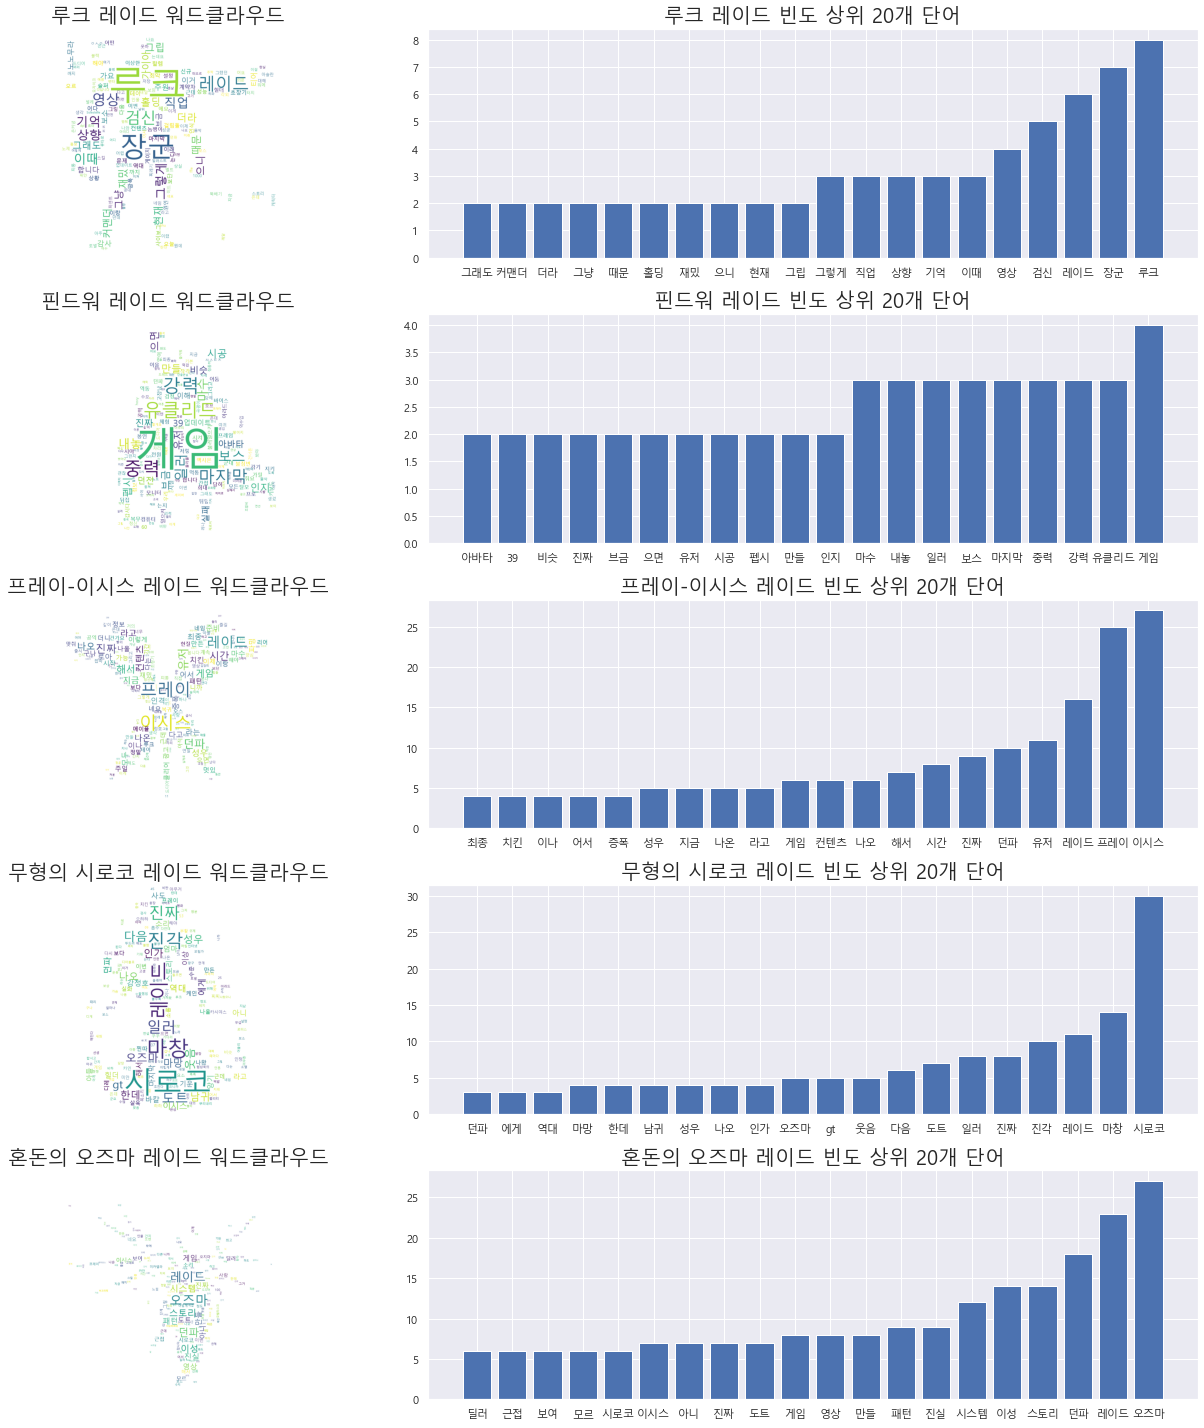

In [68]:
fig, axes = plt.subplots(5, 2, figsize = (20, 20))
words_dict = defaultdict()


for idx, axis in enumerate(axes):
    try:
        name = raid_name[idx].strip()
        comments = raid_comments[raid_comments["title"] == name]
        comments_list = comments["comment"].apply(lambda x : process(x, mecab, stopwords, True)).tolist()
        comments_list = sum(comments_list, [])
        comments_list = [i for i in comments_list if len(i) != 1]
        count_words = Counter(comments_list)
        words_dict[name] = count_words
        
        icon = Image.open(f"../photo/{name}.jpg").convert("RGBA")
        icon = icon.resize([500,500])
        mask = Image.new("RGB", icon.size, (255,255,255))
        mask.paste(icon, icon)
        mask = np.array(mask)        

        wc = WordCloud(font_path='malgun', width=800, height=800, scale=2.0, 
                       max_font_size=250, mask=mask, background_color='white')
        gen = wc.generate_from_frequencies(count_words)

        axis[0].imshow(gen)
        axis[0].set_title(f"{name} 레이드 워드클라우드", fontsize = 20)
        axis[0].grid(False)
        axis[0].axis("off")

        top_word_20 = sorted(list(count_words.items()), key = lambda x : x[1], reverse=True)[:20][::-1]
        words = []
        num = []
        for i, j in top_word_20:
            words += [i]
            num += [j]
        axis[1].bar(x=words, height=num)
        axis[1].set_title(f"{name} 레이드 빈도 상위 20개 단어", fontsize = 20)
        axis[1].xticks(fontsize=30)
            
    except:
        pass
    
plt.tight_layout()
plt.show()

레이드마다 가장 많이 나온 단어들이 나온 댓글들을 불러와서 어떠한 내용이 담겨있는지 살펴보겠습니다.

In [32]:
words_dict = dict(words_dict)
for i in words_dict:
    top_word = max(list(words_dict[i].items()), key=lambda x : x[1])[0]
    print(f"{i} 레이드 가장 많이 나온 단어 : {top_word}")
    for j in raid_comments["comment"]:
        if top_word in j:
            print(f"-{process(j, mecab)}-")
    print("\n")

루크 레이드 가장 많이 나온 단어 : 루크
-초창기 루크 해보고싶다-
-근데 루크가 힘을 잃고 기억을 잃었던 것은 힐더때문 어떤 것이 원인이에요-
-설정에서도 그렇고 이번 업데이트 루크레이드 스토리에도 기억과 힘의 상실에 대해 나와있어요ㅇㅅㅇ-
-이랬던 루크가 현재 뚝배기가 깨지고있습니다-
-그랬던 루크가 이제 없어졌습니다-
-퍼섭에서 검신인 할기삼님이 루크 토벌 성공했습니다-
-영상이 현실성없네요 어떻게 루크레이드를 커맨더가 가요-
-주작개쩌네 장군님 루크못가요-
-1 2년이면 루크처럼될 레이드-
-마수나오고 일년접었을때 탬처분 안한거 오늘 다 처분 로아나 하러가야지 난이도 보다 이짓을 일년이나 돌아야하고 이번 신규는 6월쯤 풀초테이일건데 그럼 프레이레이드 하다가 다음레이드임 내가 왜 복귀했을까 루크때 마수나온거보고 질려서 접었는데 나는 접기전 던파 12년동안 계속했었음 썩은물이였지 그런데 크리스마스때 여친만 있었어도 복귀 안했을듯 왜 미워도 다시한번 광고 찍었냐 또 미운짓 할거면서 아 그리고 니들 사원 몇몆 댓글알바하는거 다 아니까 즉당히하고-
-할렘때부터 키운 요원 천공헬 거의 안돌리고 마수 루크 테이 병행해서 지금 천공 억년 마수 헤블론끼고 핀드워 입성해서 지금 반물질 190개 가량 있는디-
-로터스 디레지레 바칼 안톤 루크 프레이 시로코 남은 사도 및 같은편은 카시야스 힐더 카인 정도가 스토리상 힐더랑 카시야스도 붙을거 같은데 시로코 설정상 검사들에게 패배후 소멸인데 부활했으니까-


핀드워 레이드 가장 많이 나온 단어 : 게임
-님들아 이제 이 더러운 게임 못해먹겠어요 저는 이만 접도록 할게요 9년간 즐거웠다 시발 게임-
-이게 게임이냐 재료비 조합비 꼬라지봐라 ㅋㅋㅋㅋ-
-킹성욱디렉터가 내놓은 마수던전이 실패하자 중국 본섭에서는 마수 내놓지 않겠다 하여 내놓은것이 초시공 이른바 핀드워 턴제게임 비슷하고 병참기지 이런것으로 하여금 소녀전선 같은 이미지가 연상되는데 마수 던전 실패해서 민심이 여론이 안좋아 본섭에서 가져온 핀드워를 할렘업데이트 직후 테

**분석 인사이트 정리**
1. 루크 레이드 가장 많이 나온 단어 : 루크
    - 루크 레이드와 관련된 내용으로는 스토리에 대한 관심도가 높았으며 앞선 LVSM 점수에서 가장 높게 나온 레이드의 내용이 생각보다 좋은 여론은 보이지가 않습니다.


2. 핀드워 레이드 가장 많이 나온 단어 : 게임
    - 앞선 LVSM 점수가 가장 낮게 나온 핀드워 레이드의 경우 댓글 내용들이 굉장히 부정적으로 보입니다.
    - 부정적인 여론에 대한 주제로는 졸업 아이템에 소비되는 재료비와 조합비에 대한 불만이 있었고, 일부 패턴은 바로 파악하는데 어려움이 있다는 반응도 있습니다..


3. 프레이-이시스 레이드 가장 많이 나온 단어 : 이시스
    - 앞선 레이드와는 다르게 유저가 직접 프레이 레이드를 개선하는 방향을 제시하는 것으로 모습을 보이고 있으며 전체적으로 프레이 레이드에 대한 게임성은 좋은 것으로 보입니다..
    - 다른 내용으로는 프레이의 이름에 대한 토론이 있었는데 단순히 레이드 플레이 말고도 스토리적 측면에 해당하는 부분도 활발하게 의견을 주고 받는 것으로 보아 해당 레이드는 스토리적 몰입도가 좋은 레이드로 볼 수 있다고 생각합니다.


4. 무형의 시로코 레이드 가장 많이 나온 단어 : 시로코
    - 처음 시로코 레이드가 나올 시기의 댓글들로 보이며 해당 시기의 유저들은 시로코 레이드에 대한 기대도가 굉장히 높은 것으로 보입니다.
    - 시로코 레이드 또한 게임의 스토리상 중요한 부분을 차지하기 때문에 많은 유저들이 스토리를 어떻게 풀어나갈지 궁금해 하는 것도 보입니다.


5. 혼돈의 오즈마 레이드 가장 많이 나온 단어 : 오즈마
    - 오즈마 또한 bgm과 도트, 스토리와 같은 부분은 굉장히 호평으로 보입니다.
    - 하지만 이번 오즈마 레이드의 경우 어려운 패턴이 많다보니 유저들이 다소 피로감을 토로하고 있으며 특히 근접딜러의 경우 이성 수치를 관리하기가 더 어려워서 더 심하다고 느끼는 것으로 보입니다.

## 4. 결론

- 조회수와 좋아요의 개수를 기반으로 LVSM 이라는 새로운 지표를 설계하고 해당 지표를 기반으로 어떠한 컨텐츠가 유저들에게 선호되어지고 있는지 분석하였습니다.
- 가장 선호도가 좋았던 내용은 '진각성 업데이트'들이 좋은 평가를 받았으며 그 중에서도 남마법사와 남프리스트의 평가가 다른 캐릭터에 비하여 더 좋은 평가를 받았습니다.
- '진각성 업데이트'말고도 분석하기 전에는 몰랐던 던파OST가 상당히 선호되는 것을 알 수 있었습니다.
- 이벤트 업데이트들 중에서도 가장 인기가 좋았던 이벤트는 '아라드 레인저' 이벤트로 해당 이벤트의 경우 부캐릭터 육성에 큰 도움을 주는 이벤트이기에 현재 다캐릭 육성을 권장하고, 이를 즐기고 있는 유저들에게 아주 좋은 이벤트라고 생각됩니다.
- 일부 좋지 못한 내용에 대해서는 던파라는 게임의 이미지가 아직 '정공', '공익' 이라는 단어에 얽매여 있는 것으로 보이며 이러한 이미지를 개선시킬 방향을 모색해야 합니다.
- 레이드 컨텐츠의 경우 레이드 시스템에 대한 호평보다는 해당 레이드와 관련된 스토리에 많은 유저가 관심을 가지고 있는 것으로 보입니다.

**향후 분석 계획**  
지금까지 분석결과 게임내의 레이드와 같은 컨텐츠 위주보다는 캐릭터의 새로운 전직 시스템, 진각성 업데이트와 같은 변화에 유저들이 더 민감하게 받아들이고 있는 것으로 보입니다.  

케릭터 관련 시스템 업데이트가 민감한 이유는 자신이 키우는 캐릭터에 대한 애정도 있지만, 던파라는 게임의 특성상 레이드라는 컨텐츠와 밀접한 연관성이 있기 때문입니다.  
왜냐하면 현재 진행하고 있는 레이드나 향후 업데이트로 나올 새로운 레이드 지속딜인지, 한방딜(딜찍누)인지와 같은 메타가 무엇이냐에 따라서 해당 레이드에 강한 케릭터와 약한 케릭터가 나뉘고 이러한 양분화를 막기 위한 캐릭터 밸런싱 패치를 해야 하는데 앞선 분석을 통하여 캐릭터 시스템에 대한 패치에는 민감한 유저가 많아서 상당히 조심스럽게 진행되어야 합니다.

앞으로 제안하는 분석의 방향성은 2가지 입니다.
1. 지금까지 나온 레이드에 대한 유저들의 의견을 수렴하여 앞으로의 레이드 방향성 계획
2. 현재 케릭터들의 밸런스가 유지되고 있는지 밸런스의 문제가 발생하면 문제가 무엇인지 분석